In [50]:
pip list

Package                   VersionNote: you may need to restart the kernel to use updated packages.

------------------------- --------------
anyio                     4.3.0
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.1
async-lru                 2.0.4
attrs                     23.2.0
Babel                     2.14.0
beautifulsoup4            4.12.3
bleach                    6.1.0
blinker                   1.7.0
certifi                   2024.2.2
cffi                      1.16.0
charset-normalizer        3.3.2
click                     8.1.7
colorama                  0.4.6
comm                      0.2.2
contourpy                 1.2.0
cycler                    0.12.1
debugpy                   1.8.1
decorator                 5.1.1
defusedxml                0.7.1
executing                 2.0.1
fastjsonschema            2.19.1
Flask                     3.0.2
fonttools                 4.50.0
fqdn           

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load the dataset

In [52]:
# from sklearn.datasets import fetch_openml
# housing = fetch_openml(name="house_prices", as_frame=True)
# housing.keys()

In [53]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [54]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [55]:
## Lets check description
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [56]:
print(housing.data)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


In [57]:
## Checking the target values, these are expressed in $100.000
print(housing.target)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [58]:
## Checking the feature names
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


# Preparing the data

In [59]:
# Create the pandas dataframe using the data and the feature names
dataset = pd.DataFrame(housing.data, columns=housing.feature_names)

In [60]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [61]:
dataset["Price"] = housing.target

In [62]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [63]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [64]:
## Summarizing the stats of the data
dataset.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [65]:
## Check for missing values
dataset.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [66]:
### EDA (Exploraty Data Analysis)

## Correlation: Closer to 1 is positive correlation, closer to -1 is a negative correlation
dataset.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


Text(0, 0.5, 'Price (x100.000)')

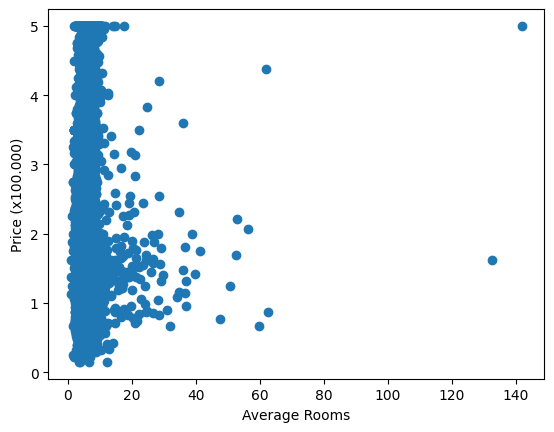

In [67]:
plt.scatter(dataset["AveRooms"], dataset["Price"])
plt.xlabel("Average Rooms")
plt.ylabel("Price (x100.000)")

<Axes: xlabel='MedInc', ylabel='Price'>

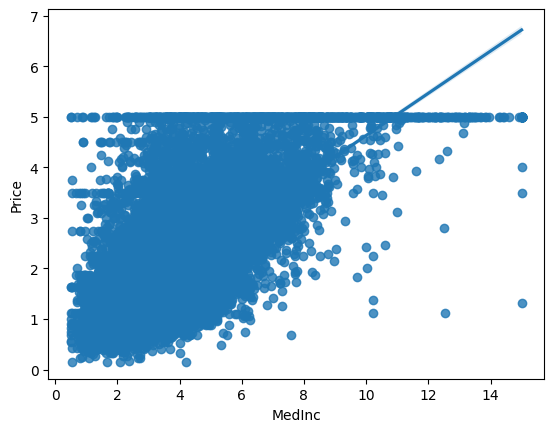

In [68]:
sns.regplot(x="MedInc", y="Price", data=dataset)

<Axes: xlabel='HouseAge', ylabel='Price'>

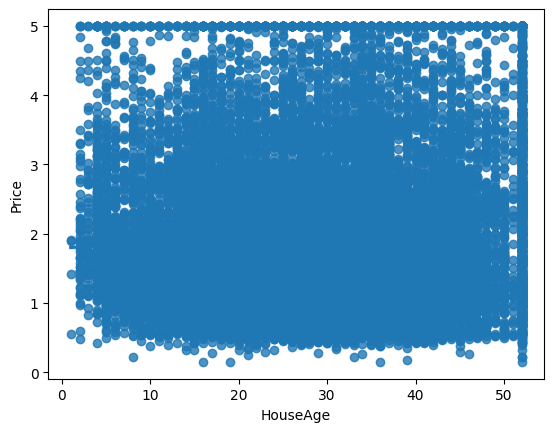

In [69]:
sns.regplot(x="HouseAge", y="Price", data=dataset)

In [70]:
## Independent and dependent features

X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [71]:
## Train, test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [72]:
## Standardizing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [73]:
X_train = scaler.fit_transform(X_train)

In [74]:
X_test = scaler.transform(X_test)

In [75]:
X_train

array([[ 0.13350629,  0.50935748,  0.18106017, ..., -0.01082519,
        -0.80568191,  0.78093406],
       [-0.53221805, -0.67987313, -0.42262953, ..., -0.08931585,
        -1.33947268,  1.24526986],
       [ 0.1709897 , -0.36274497,  0.07312833, ..., -0.04480037,
        -0.49664515, -0.27755183],
       ...,
       [-0.49478713,  0.58863952, -0.59156984, ...,  0.01720102,
        -0.75885816,  0.60119118],
       [ 0.96717102, -1.07628333,  0.39014889, ...,  0.00482125,
         0.90338501, -1.18625198],
       [-0.68320166,  1.85715216, -0.82965604, ..., -0.0816717 ,
         0.99235014, -1.41592345]])

# Training the model

In [76]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()

In [77]:
regression.fit(X_train, y_train)

LinearRegression()

In [78]:
## Print the coefficients and the intercept
print(regression.coef_)

[ 8.49221760e-01  1.22119309e-01 -2.99558449e-01  3.48409673e-01
 -8.84488134e-04 -4.16980388e-02 -8.93855649e-01 -8.68616688e-01]


In [79]:
print(regression.intercept_)

2.0692396089424165


In [80]:
## on which parameters the model will be trained
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [81]:
### Predication with test data
reg_pred = regression.predict(X_test)

In [82]:
reg_pred

array([0.72604907, 1.76743383, 2.71092161, ..., 2.07465531, 1.57371395,
       1.82744133])

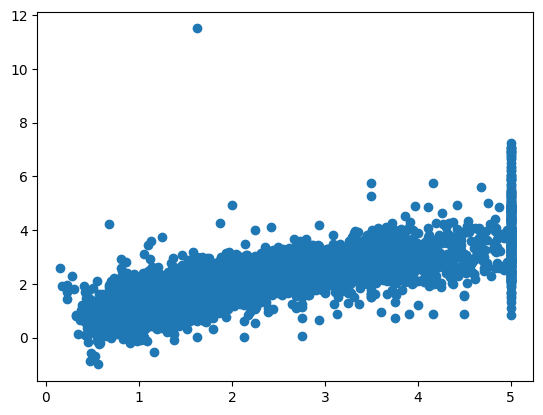

In [83]:
## Plot a scatter for the prediction

plt.scatter(y_test, reg_pred)

In [84]:
# Residuals, aka errors
residuals = y_test - reg_pred

In [85]:
residuals

20046   -0.249049
3024    -1.309434
15663    2.289088
20484   -0.649147
9814     0.173042
           ...   
17505    0.155059
13512   -0.237516
10842    0.109345
16559   -0.379714
5786     0.270559
Name: Price, Length: 6192, dtype: float64

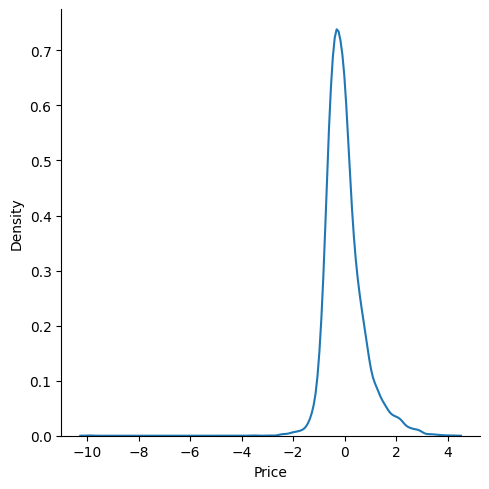

In [86]:
## Plot the residuals or errors

sns.displot(residuals, kind="kde")

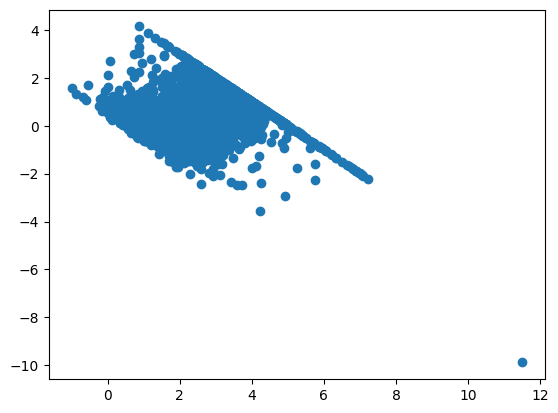

In [87]:
## Scatter plot with predictions and residuals
plt.scatter(reg_pred, residuals)

In [88]:
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae, r2_score

print(mae(y_test, reg_pred))
print(mse(y_test, reg_pred))
print(np.sqrt(mse(y_test, reg_pred)))

0.5272474538305952
0.5305677824766752
0.7284008391515452


# R square and adjusted R square

In [89]:
score = r2_score(y_test, reg_pred)
print(score)

0.5957702326061665


In [90]:
1 - (1-score)*(len(y_test)-1) / (len(y_test)-X_test.shape[1]-1)

0.5952472117200027

# New Data Prediction

In [91]:
housing.data[0].reshape(1, -1)

array([[   8.3252    ,   41.        ,    6.98412698,    1.02380952,
         322.        ,    2.55555556,   37.88      , -122.23      ]])

In [92]:
## Transformation of new data

scaler.transform(housing.data[0].reshape(1, -1))

c:\Users\Nico\Documents\Projects\ML_Project_HousePrices_Git\HousePricing\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 2.33526315,  0.98504972,  0.63012521, -0.16586931, -0.96995366,
        -0.04555657,  1.04385626, -1.32105914]])

In [93]:
regression.predict(scaler.transform(housing.data[0].reshape(1, -1)))

c:\Users\Nico\Documents\Projects\ML_Project_HousePrices_Git\HousePricing\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([4.14333441])

# Pickle the model file

In [94]:
import pickle

In [95]:
# pickle.dump(regression, open('regmodel.pkl', 'wb'))

In [96]:
# pickled_model = pickle.load(open('regmodel.pkl', "rb"))

In [97]:
# pickled_model.predict(scaler.transform(housing.data[0].reshape(1, -1)))